# DETECTING MALARIYA
## (A DEEP LEARNING PROJECT)

### IMPORTING ESSENTIAL MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle

### SETTING DATAPATH AND OTHER THINGS

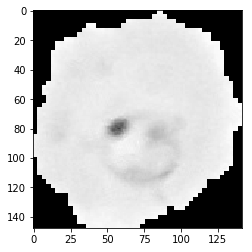

In [2]:
DATADIR ="/media/kvac/DRIVE-D/datasets/cell-images-for-detecting-malaria/cell_images"
CATEGORIES = ["Parasitized", "Uninfected"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [3]:
img_array.shape

(148, 142)

In [4]:
img_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### RESIZING IMAGES AND CONVERTING INTO GRAY SCALE

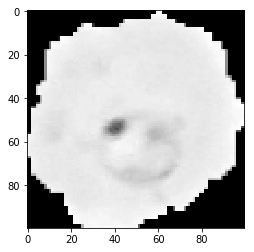

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

### MAKING A LIST OF TRAINING DATA(IMAGES)

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass     

In [7]:
create_training_data()

100%|██████████| 13779/13779 [00:10<00:00, 1259.00it/s]


In [8]:
len(training_data)

27556

### SHUFFLING TRAINING DATA

In [9]:
training_data = shuffle(training_data, random_state=1)

In [10]:
for sample in training_data[:10]:
    print(sample[1])


0
0
0
1
0
0
0
1
0
1


### SETTING FEATURE LIST AND TARGET

In [11]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 for gray scale, we can use 3 for color.
X[0]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

### IMPORTING PICKLE MODULE AND SAVE X's AND Y's

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### We can always load it in to our current script, or a totally new one by doing:

In [1]:
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

### IMPORTING MODULES

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

### NORMALIZING THE IMAGE ARRAY

In [3]:
X = X/255.0 #normalize the image array.

### ADDING LAYERS TO OUR MODEL

In [4]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))



Instructions for updating:
Colocations handled automatically by placer.


### COMPILING THE MODEL

In [5]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

### FITTING THE MODEL

In [6]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 19289 samples, validate on 8267 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
19289/19289 [==============================] - 428s 22ms/sample - loss: 0.6890 - acc: 0.5550 - val_loss: 0.6731 - val_acc: 0.5921
Epoch 2/10
19289/19289 [==============================] - 424s 22ms/sample - loss: 0.6601 - acc: 0.6063 - val_loss: 0.6531 - val_acc: 0.6088
Epoch 3/10
19289/19289 [==============================] - 423s 22ms/sample - loss: 0.6369 - acc: 0.6396 - val_loss: 0.6456 - val_acc: 0.6180
Epoch 4/10
19289/19289 [==============================] - 422s 22ms/sample - loss: 0.6162 - acc: 0.6653 - val_loss: 0.6486 - val_acc: 0.6325
Epoch 5/10
19289/19289 [==============================] - 415s 22ms/sample - loss: 0.5961 - acc: 0.6853 - val_loss: 0.6071 - val_acc: 0.6832
Epoch 6/10
19289/19289 [==============================] - 422s 22ms/sample - loss: 0.5019 - acc: 0.7543 - val_loss: 0.3912 - val_acc: 0.8336
Epoch 7/10
19289/19289 [==============================] -

Accuracy of our model is 94.77% and validation accuracy is 92.86% in the last epoch.

### SAVING THE MODEL

In [7]:
model.save('malariya.model')

### Now, we will predict the images.

In [1]:
import cv2
import tensorflow as tf
import os
import numpy as np

In [2]:
CATEGORIES = ["Parasitized", "Uninfected"]

def prepare(filepath):
    Img_size = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (Img_size, Img_size))
    new_array = new_array/255.0
    return new_array.reshape(-1, Img_size, Img_size, 1)

In [3]:
model = tf.keras.models.load_model('malariya.model')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [11]:
test_img = [prepare('a.png')]
predict = model.predict(test_img)
predict= np.ndarray.round(predict)

In [12]:
print(CATEGORIES[int(predict)])

Uninfected


In [16]:
test_img = [prepare('b.png')]
predict_1 = model.predict(test_img)
predict_1= np.ndarray.round(predict_1)

In [17]:
print(CATEGORIES[int(predict_1)])

Parasitized


SOURCE : https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria